In [1]:
# автоперезагрузка функций из внешних скриптов
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

import json
from pprint import pprint

from tqdm import tqdm_notebook as tqdm
tqdm().pandas()

import glob

import os
from os.path import join


pd.options.display.max_columns = 999
pd.options.display.max_rows = 999

%pylab inline
figsize(14,6)


Populating the interactive namespace from numpy and matplotlib


/home/nikolai/Projects/MIPT-ML-Fall-2019/env/lib/python3.7/site-packages/tqdm/_tqdm.py:634: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [3]:
def plot_violin_hist(data, target, column):
    plt.subplot(1,2,1)
    sns.violinplot(x = target, y = column, data = data)
    plt.subplot(1,2,2)
    sns.distplot(data[data[target] == 1.0][column], color = 'green')
    sns.distplot(data[data[target] == 0.0][column], color = 'red')
    plt.show()
    
def plot_hist_discrete(data, target, column):
    #sns.factorplot(x = target, y = column, hue="smoker", data=tips, kind="bar");
    bins = data[column].nunique()
    plt.hist([data[data[target] == 1.0][column], data[data[target] == 0.0][column]], color=['g','r'], 
             alpha=0.5, bins=bins)
    plt.title(column)
    plt.show()
    
heroes = {
    25: 'shaman',
    326: 'hunter',
    390: 'warlock',
    494: 'mage',
    612: 'druid',
    754: 'rogue',
    798: 'priest',
    981: 'paladin',
    1235: 'warrior'
}

# Load Data

In [4]:
df_tabs = []
for filename in tqdm(glob.glob(join('./data/','*_tabular*'))):
    dff = pd.read_csv(filename)
    df_tabs.append(dff)
df_all = pd.concat(df_tabs)

In [5]:
df_all.head()

,gamestate_id,decision,turn,opponent.armor,opponent.attack,opponent.hero_card_id,opponent.hp,opponent.special_skill_used,opponent.weapon_durability,opponent.crystals_all,opponent.crystals_current,opponent.deck_count,opponent.fatigue_damage,opponent.hand_count,opponent.played_minions_count,player.armor,player.attack,player.hero_card_id,player.hp,player.special_skill_used,player.weapon_durability,player.crystals_all,player.crystals_current,player.deck_count,player.fatigue_damage,player.hand_count,player.played_minions_count,opponent.played.nOfCards,opponent.played.attack,opponent.played.crystals_cost,opponent.played.hp_current,opponent.played.hp_max,player.played.nOfCards,player.played.attack,player.played.crystals_cost,player.played.hp_current,player.played.hp_max,player.hand.nOfMinions,player.hand.nOfSpells,player.hand.nOfWeapons,player.hand.nOfCards,player.hand.nOfPlayable,player.hand.attack,player.hand.crystals_cost,player.hand.hp
0,4687346,1,14,0,0,798,5,0,0,10,10,11,0,2,1,0,0,981,17,1,0,10,0,12,0,5,5,1,2,4,6,8,5,21,20,20,23,4,0,1,5,0,20,22,17
1,3270826,1,7,0,0,754,22,0,0,6,6,19,0,8,1,0,0,754,29,0,0,7,0,18,0,7,5,1,2,4,2,4,5,10,16,16,17,3,2,2,7,0,17,26,20
2,3189487,1,5,3,0,612,29,0,0,4,1,22,0,4,2,1,0,612,30,0,0,6,5,22,0,5,0,2,8,5,8,8,0,0,0,0,0,5,0,0,5,2,26,28,27
3,4098946,1,8,0,0,390,26,0,0,7,7,17,0,7,0,0,0,981,26,0,0,8,8,19,0,9,1,0,0,0,0,0,1,3,2,2,2,7,1,1,9,9,36,44,36
4,2661127,0,13,0,0,25,30,0,0,10,1,12,0,3,4,0,0,494,8,0,0,10,10,14,0,4,1,4,15,14,16,16,1,6,6,7,7,4,0,0,4,4,13,13,14


In [6]:
df_all[['turn','opponent.crystals_all','opponent.crystals_current','opponent.deck_count',
          'player.crystals_all','player.crystals_current','player.deck_count',]][df_all.turn == 1].describe()

,turn,opponent.crystals_all,opponent.crystals_current,opponent.deck_count,player.crystals_all,player.crystals_current,player.deck_count
count,20979.0,20979.0,20979.0,20979.0,20979.000000,20979.000000,20979.000000
mean,1.0,0.0,0.0,26.0,1.001049,0.897469,25.984556
std,0.0,0.0,0.0,0.0,0.032367,0.415890,0.214699
min,1.0,0.0,0.0,26.0,1.000000,0.000000,23.000000
25%,1.0,0.0,0.0,26.0,1.000000,1.000000,26.000000
50%,1.0,0.0,0.0,26.0,1.000000,1.000000,26.000000
75%,1.0,0.0,0.0,26.0,1.000000,1.000000,26.000000
max,1.0,0.0,0.0,26.0,2.000000,5.000000,26.000000


In [7]:
df_all[['turn','opponent.crystals_all','opponent.crystals_current','opponent.deck_count',
          'player.crystals_all','player.crystals_current','player.deck_count',]][df_all.turn == 5].describe()


,turn,opponent.crystals_all,opponent.crystals_current,opponent.deck_count,player.crystals_all,player.crystals_current,player.deck_count
count,70683.0,70683.000000,70683.000000,70683.000000,70683.000000,70683.00000,70683.000000
mean,5.0,4.037491,1.058020,21.618947,4.786101,2.38858,21.828445
std,0.0,0.204386,1.381968,0.723344,0.478020,2.01956,0.885925
min,5.0,4.000000,0.000000,18.000000,4.000000,0.00000,17.000000
25%,5.0,4.000000,0.000000,21.000000,5.000000,1.00000,21.000000
50%,5.0,4.000000,1.000000,22.000000,5.000000,2.00000,22.000000
75%,5.0,4.000000,2.000000,22.000000,5.000000,5.00000,22.000000
max,5.0,6.000000,8.000000,22.000000,7.000000,9.00000,23.000000


In [8]:
# всегда поддерживайте удобство просмотра и работы с данными
df_all['opponent_hero_name'] = df_all['opponent.hero_card_id'].map(heroes)
df_all['player_hero_name'] = df_all['player.hero_card_id'].map(heroes)

In [9]:
# распределение таргета
df_all.decision.mean()

0.504426

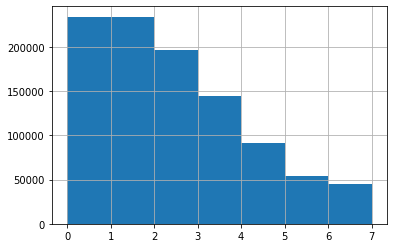

In [10]:
# сыгранные карты, максимум 7 на столе(поэтому указали бины)
df_all['player.played.nOfCards'].hist(bins=7)

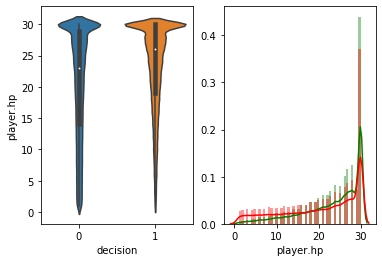

In [11]:
# график ХП. С оппонентом ситуация зеркальная
plot_violin_hist(df_all, 'decision', 'player.hp')

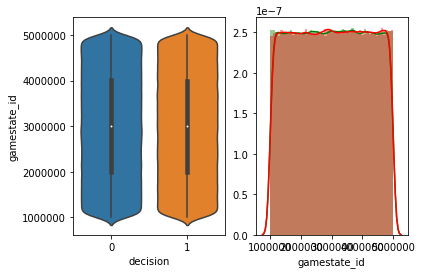

In [12]:
# иногда по id можно найти лик в данных
plot_violin_hist(df_all, 'decision', 'gamestate_id')

In [13]:
# Важно оценивать хп+армор а не по отдельности, может так картина будет более выразительной

df_all['opponent.hp.armor'] = df_all['opponent.hp'] + df_all['opponent.armor']
df_all['player.hp.armor'] = df_all['player.hp'] + df_all['player.armor']

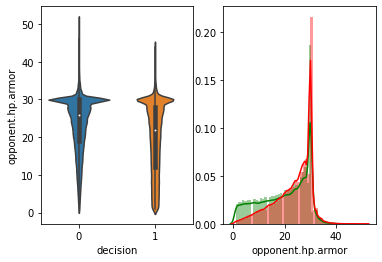

In [14]:
# opponent.hp.armor
# ситуация стала более выраженная!

plot_violin_hist(df_all, 'decision', 'opponent.hp.armor')

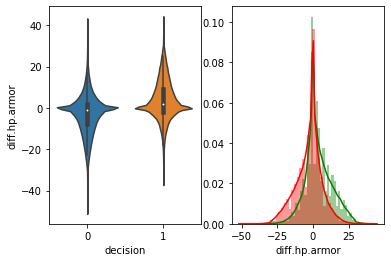

In [15]:
# Так же оценим разность hp+armor для игроков
df_all['diff.hp.armor'] = df_all['player.hp.armor'] - df_all['opponent.hp.armor']
plot_violin_hist(df_all, 'decision', 'diff.hp.armor')

# Cards in hands

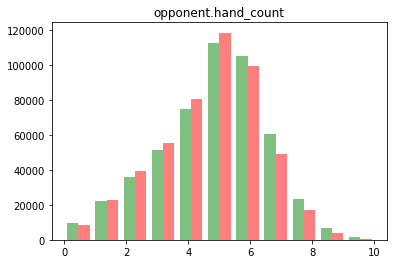

In [16]:
plot_hist_discrete(df_all, 'decision', 'opponent.hand_count')

In [17]:
# One-Hot encoding категориальных признаков
# можно делать через sklearn.preprocessing.OneHotEncoder - дело привычки
def ohe_column(df, column):
    df_ohe = pd.get_dummies(df[column], prefix=column)
    df = pd.concat([df, df_ohe], axis=1)
    return df

# Консоль из Jupyter. Проверка пропущенных значений

In [18]:
! pip install -U missingno

Requirement already up-to-date: missingno in ./env/lib/python3.7/site-packages (0.4.2)


/home/nikolai/Projects/MIPT-ML-Fall-2019/env/lib/python3.7/site-packages/missingno/missingno.py:198: UserWarning: The 'inline' argument has been deprecated, and will be removed in a future version of missingno.
  "The 'inline' argument has been deprecated, and will be removed in a future version "


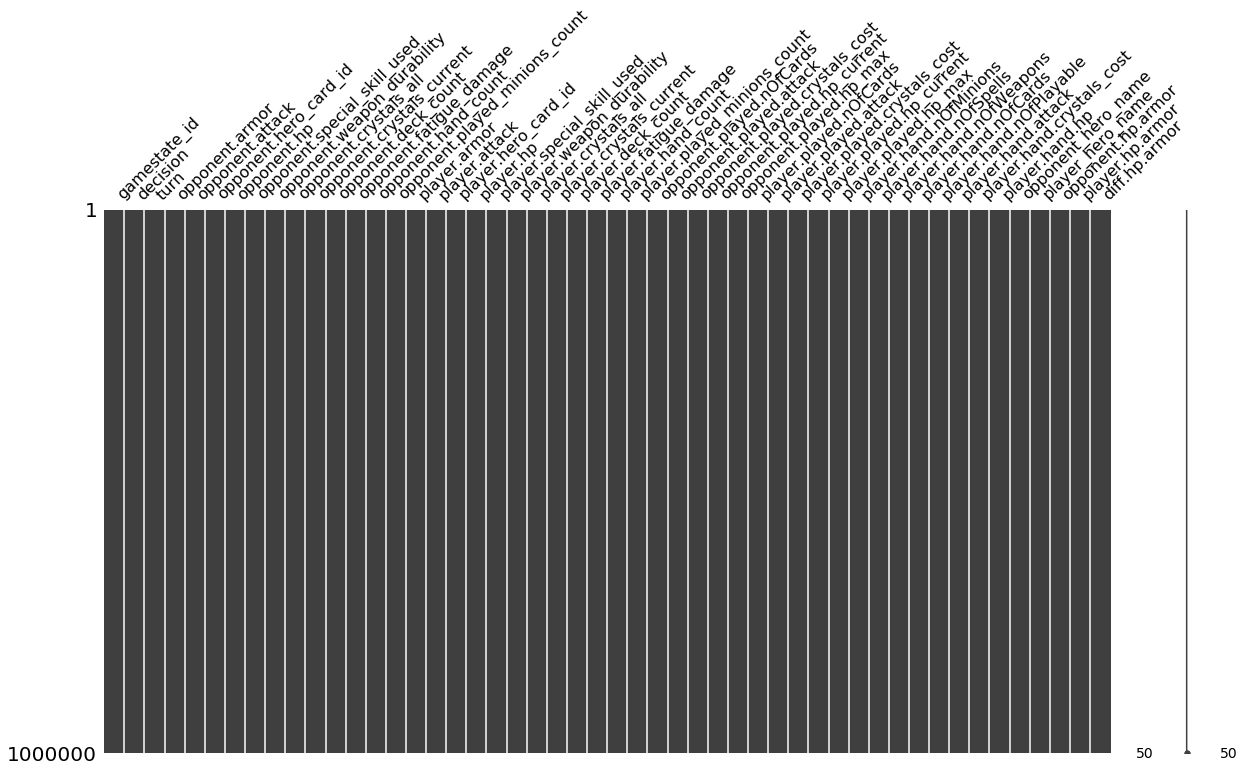

In [19]:
import missingno as msno
msno.matrix(df_all, inline=True, sparkline=True, figsize=(20, 10), sort=None)

In [20]:
df_all.head()

,gamestate_id,decision,turn,opponent.armor,opponent.attack,opponent.hero_card_id,opponent.hp,opponent.special_skill_used,opponent.weapon_durability,opponent.crystals_all,opponent.crystals_current,opponent.deck_count,opponent.fatigue_damage,opponent.hand_count,opponent.played_minions_count,player.armor,player.attack,player.hero_card_id,player.hp,player.special_skill_used,player.weapon_durability,player.crystals_all,player.crystals_current,player.deck_count,player.fatigue_damage,player.hand_count,player.played_minions_count,opponent.played.nOfCards,opponent.played.attack,opponent.played.crystals_cost,opponent.played.hp_current,opponent.played.hp_max,player.played.nOfCards,player.played.attack,player.played.crystals_cost,player.played.hp_current,player.played.hp_max,player.hand.nOfMinions,player.hand.nOfSpells,player.hand.nOfWeapons,player.hand.nOfCards,player.hand.nOfPlayable,player.hand.attack,player.hand.crystals_cost,player.hand.hp,opponent_hero_name,player_hero_name,opponent.hp.armor,player.hp.armor,diff.hp.armor
0,4687346,1,14,0,0,798,5,0,0,10,10,11,0,2,1,0,0,981,17,1,0,10,0,12,0,5,5,1,2,4,6,8,5,21,20,20,23,4,0,1,5,0,20,22,17,priest,paladin,5,17,12
1,3270826,1,7,0,0,754,22,0,0,6,6,19,0,8,1,0,0,754,29,0,0,7,0,18,0,7,5,1,2,4,2,4,5,10,16,16,17,3,2,2,7,0,17,26,20,rogue,rogue,22,29,7
2,3189487,1,5,3,0,612,29,0,0,4,1,22,0,4,2,1,0,612,30,0,0,6,5,22,0,5,0,2,8,5,8,8,0,0,0,0,0,5,0,0,5,2,26,28,27,druid,druid,32,31,-1
3,4098946,1,8,0,0,390,26,0,0,7,7,17,0,7,0,0,0,981,26,0,0,8,8,19,0,9,1,0,0,0,0,0,1,3,2,2,2,7,1,1,9,9,36,44,36,warlock,paladin,26,26,0
4,2661127,0,13,0,0,25,30,0,0,10,1,12,0,3,4,0,0,494,8,0,0,10,10,14,0,4,1,4,15,14,16,16,1,6,6,7,7,4,0,0,4,4,13,13,14,shaman,mage,30,8,-22


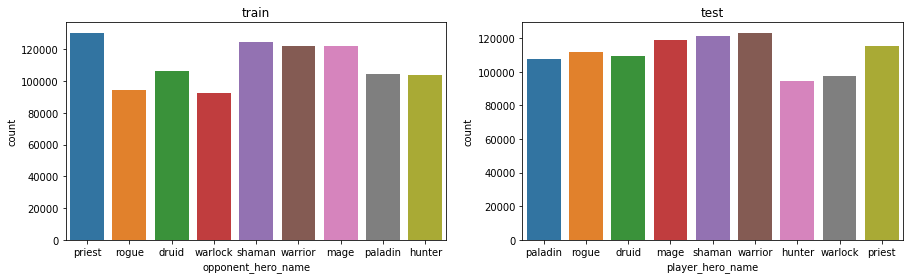

In [21]:
fig, ax=plt.subplots(figsize=(15, 4))
plt.subplot(1, 2, 1)
plt.title('train')
sns.countplot(df_all['opponent_hero_name'])
plt.subplot(1, 2, 2)
plt.title('test')
sns.countplot(df_all['player_hero_name'])

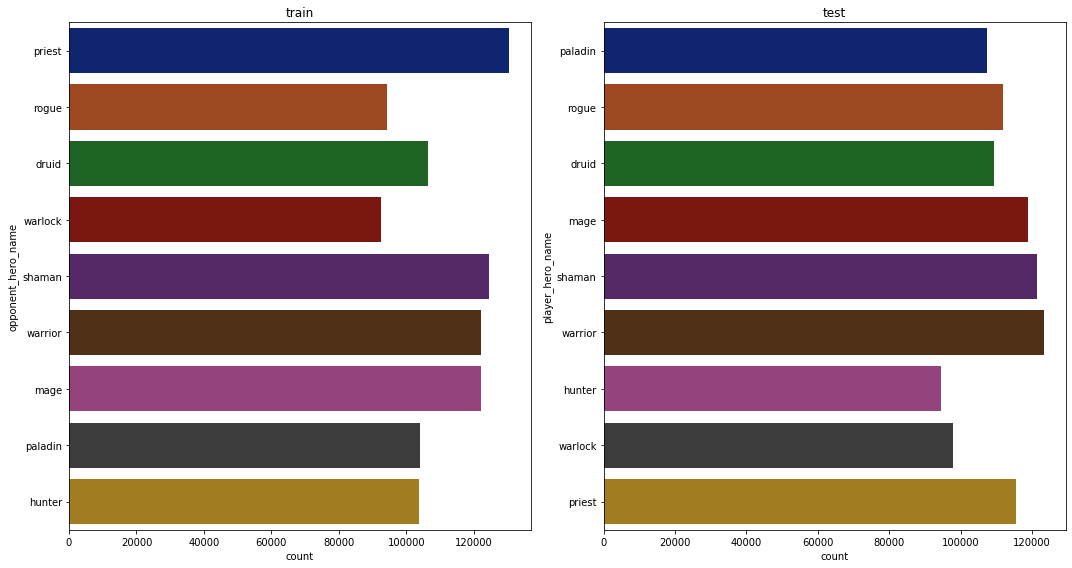

In [22]:
# если категорий много и надписи могут поплыть

fig, ax=plt.subplots(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.title('train')
g=sns.countplot(y=df_all['opponent_hero_name'], order=df_all['opponent_hero_name'].unique(),
                orient='v', palette='dark');

plt.subplot(1, 2, 2)
plt.title('test')
g=sns.countplot(y=df_all['player_hero_name'], order=df_all['player_hero_name'].unique(),
                orient='v', palette='dark');
fig.tight_layout()

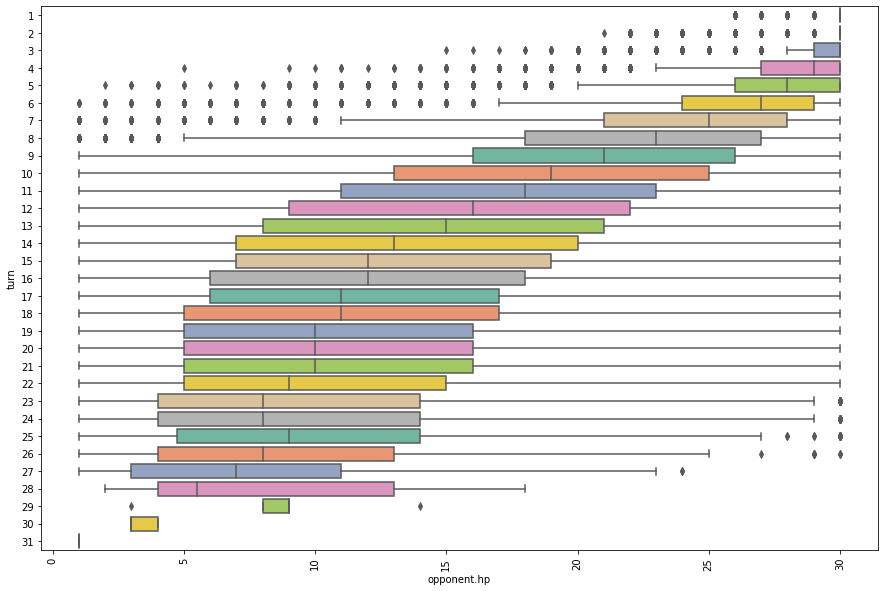

In [23]:
# боксплто, как убывает хп от хода

plt.figure(figsize=(15, 10))
sns.boxplot(y='turn', x='opponent.hp', data=df_all, orient='h', palette='Set2')
plt.xticks(rotation='vertical');

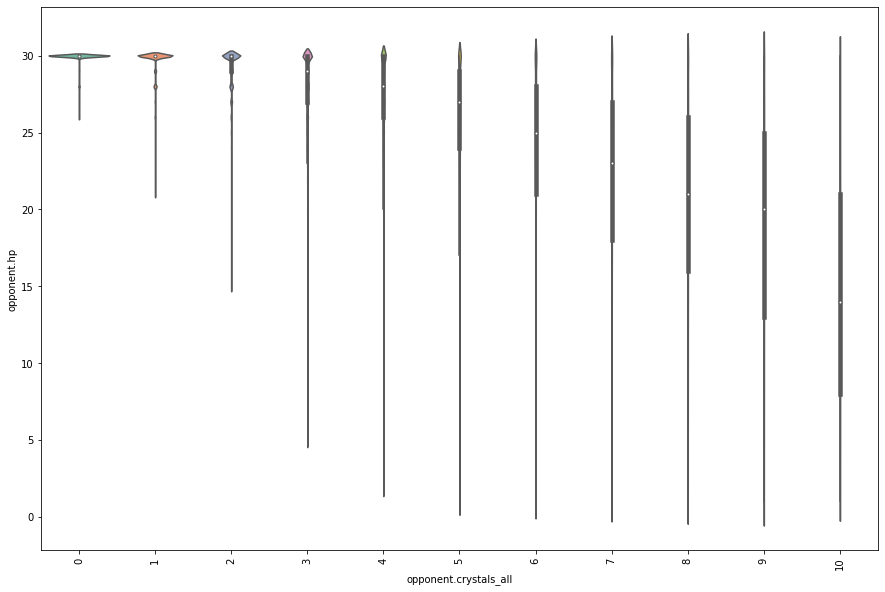

In [24]:
plt.figure(figsize=(15, 10))
sns.violinplot(x=df_all['opponent.crystals_all'], y=df_all['opponent.hp'],  palette='Set2')
plt.xticks(rotation='vertical');


In [25]:
df_corr = df_all.corr()

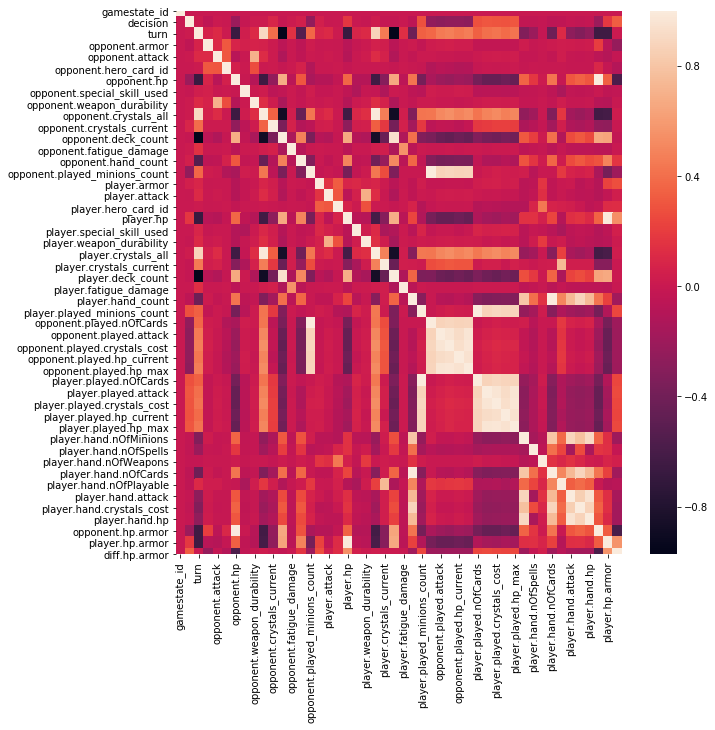

In [26]:
figsize(10,10)
sns.heatmap(df_corr)

# Кросс-Валидация

In [27]:
from sklearn.model_selection import train_test_split, StratifiedKFold

df_all_ = df_all.sample(1000)

# лучше всегда заранее отложить холдаут
df_train, df_holdout = train_test_split(df_all_, random_state=177, 
                                        test_size=0.2, stratify=df_all_['decision'])

skf = list(StratifiedKFold(n_splits=5, shuffle=True, random_state=177).split(df_train, df_train.decision))

In [28]:
drop_cols = list(df_train.select_dtypes(include=['object']).columns)
drop_cols.append('decision')
drop_cols.append('gamestate_id')
drop_cols

['opponent_hero_name', 'player_hero_name', 'decision', 'gamestate_id']

In [29]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=7, n_jobs=12)
kn.fit(df_train.drop(drop_cols, 1), df_train['decision'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=12, n_neighbors=7, p=2,
                     weights='uniform')

In [30]:
probs = kn.predict_proba(df_holdout.drop(drop_cols, 1))
probs[:10, 1]

array([0.42857143, 0.42857143, 0.42857143, 0.28571429, 0.42857143,
       0.28571429, 0.42857143, 0.85714286, 0.42857143, 0.28571429])

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV 

method = DecisionTreeClassifier()

parameters = {"criterion": ["gini", "entropy"],
              "min_samples_split": [2, 10, 20,50],
              "max_depth": [None, 2, 5, 10,30],
              "min_samples_leaf": [1, 5, 10],
              "max_leaf_nodes": [None, 5, 10, 20,50],
              }

clf = GridSearchCV(method, parameters, cv=skf, 
                   scoring='roc_auc', verbose=1)
clf.fit(df_train.drop(drop_cols, 1), df_train['decision'])

Fitting 5 folds for each of 600 candidates, totalling 3000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 3000 out of 3000 | elapsed:   34.6s finished
/home/nikolai/Projects/MIPT-ML-Fall-2019/env/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=[(array([  0,   2,   3,   4,   5,   6,   7,   8,   9,  11,  12,  14,  15,
        16,  18,  20,  22,  24,  25,  26,  27,  28,  29,  31,  32,  35,
        36,  37,  38,  39,  41,  42,  43,  44,  45,  46,  47,  49,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  63,  65,  66,
        68,  69,  70,  71,  72,  73,  76,  77,  78,  79,  80,  81,  82,
        84,  86,  87,  89,  90,  91,  92,  94,  95,  96,  97,  98,  99,
       100, 101, 102, 103, 104, 106, 107, 110, 111, 113, 115, 117, 119,
       120, 121, 122, 125, 126, 127, 129, 130, 131, 132, 134, 135,...
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 5, 10, 30],
                         'max_l

# Задание
1. Провести свой EDA на chunk1 и/или chunk4.
2. Настроить валидацию которая относит разные пары героев в разные фолды
3. Обучить KNN, logistic regression, decision tree/random forest из sklearn и сравнить результат


Страница соревнования(сейчас неактивно) https://knowledgepit.fedcsis.org/mod/page/view.php?id=1022  
Требуется предсказать победу перового игрока (player) над вторым (opponent) в игре Hearthstone.  
Победе соответствует decision==1, поражению decision==0    
Объект с уникальным gamestate_id представляет из себя сохраненное состояние какой-то игры. РАЗНЫЕ GAMESTATE_ID МОГУТ СООТВЕТСТВОВАТЬ ОДНОЙ И ТОЙ ЖЕ ИГРЕ

1. Провести свой EDA на chunk1 и/или chunk4:

In [32]:
df_all.index.value_counts()

2047      2
474189    2
470095    2
496728    2
498777    2
         ..
131861    2
138006    2
135959    2
158488    2
0         2
Length: 500000, dtype: int64

In [33]:
df_all.set_index(np.arange(df_all.shape[0]), inplace=True)

In [34]:
df_all.head()

,gamestate_id,decision,turn,opponent.armor,opponent.attack,opponent.hero_card_id,opponent.hp,opponent.special_skill_used,opponent.weapon_durability,opponent.crystals_all,opponent.crystals_current,opponent.deck_count,opponent.fatigue_damage,opponent.hand_count,opponent.played_minions_count,player.armor,player.attack,player.hero_card_id,player.hp,player.special_skill_used,player.weapon_durability,player.crystals_all,player.crystals_current,player.deck_count,player.fatigue_damage,player.hand_count,player.played_minions_count,opponent.played.nOfCards,opponent.played.attack,opponent.played.crystals_cost,opponent.played.hp_current,opponent.played.hp_max,player.played.nOfCards,player.played.attack,player.played.crystals_cost,player.played.hp_current,player.played.hp_max,player.hand.nOfMinions,player.hand.nOfSpells,player.hand.nOfWeapons,player.hand.nOfCards,player.hand.nOfPlayable,player.hand.attack,player.hand.crystals_cost,player.hand.hp,opponent_hero_name,player_hero_name,opponent.hp.armor,player.hp.armor,diff.hp.armor
0,4687346,1,14,0,0,798,5,0,0,10,10,11,0,2,1,0,0,981,17,1,0,10,0,12,0,5,5,1,2,4,6,8,5,21,20,20,23,4,0,1,5,0,20,22,17,priest,paladin,5,17,12
1,3270826,1,7,0,0,754,22,0,0,6,6,19,0,8,1,0,0,754,29,0,0,7,0,18,0,7,5,1,2,4,2,4,5,10,16,16,17,3,2,2,7,0,17,26,20,rogue,rogue,22,29,7
2,3189487,1,5,3,0,612,29,0,0,4,1,22,0,4,2,1,0,612,30,0,0,6,5,22,0,5,0,2,8,5,8,8,0,0,0,0,0,5,0,0,5,2,26,28,27,druid,druid,32,31,-1
3,4098946,1,8,0,0,390,26,0,0,7,7,17,0,7,0,0,0,981,26,0,0,8,8,19,0,9,1,0,0,0,0,0,1,3,2,2,2,7,1,1,9,9,36,44,36,warlock,paladin,26,26,0
4,2661127,0,13,0,0,25,30,0,0,10,1,12,0,3,4,0,0,494,8,0,0,10,10,14,0,4,1,4,15,14,16,16,1,6,6,7,7,4,0,0,4,4,13,13,14,shaman,mage,30,8,-22


In [35]:
# use only meaningful columns
columns = [
    'player_hero_name',
    'opponent_hero_name',
    'turn',
    'player.hp.armor',
    'player.attack',
    'player.special_skill_used',
    'player.weapon_durability',
    'player.crystals_all',
    'player.crystals_current',
    'player.deck_count',
    'player.fatigue_damage',
    'player.hand_count',
    'player.played_minions_count',
    'player.played.nOfCards',
    'player.played.attack',
    'player.played.crystals_cost',
    'player.played.hp_current',
    'player.played.hp_max',
    'player.hand.nOfMinions',
    'player.hand.nOfSpells',
    'player.hand.nOfWeapons',
    'player.hand.nOfCards',
    'player.hand.nOfPlayable',
    'player.hand.attack',
    'player.hand.crystals_cost',
    'player.hand.hp',
    'opponent.hp.armor',
    'opponent.attack',
    'opponent.special_skill_used',
    'opponent.weapon_durability',
    'opponent.crystals_all',
    'opponent.crystals_current',
    'opponent.deck_count',
    'opponent.fatigue_damage',
    'opponent.hand_count',
    'opponent.played_minions_count',
    'opponent.played.nOfCards',
    'opponent.played.attack',
    'opponent.played.crystals_cost',
    'opponent.played.hp_current',
    'opponent.played.hp_max',
    'decision'
]
df = df_all[columns]

Выпрямим средние на боксплотах здоровья от хода:

In [36]:
df['player.log.hp.armor'] = np.log(1 + df['player.hp.armor'])
df['opponent.log.hp.armor'] = np.log(1 + df['opponent.hp.armor'])

/home/nikolai/Projects/MIPT-ML-Fall-2019/env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/nikolai/Projects/MIPT-ML-Fall-2019/env/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


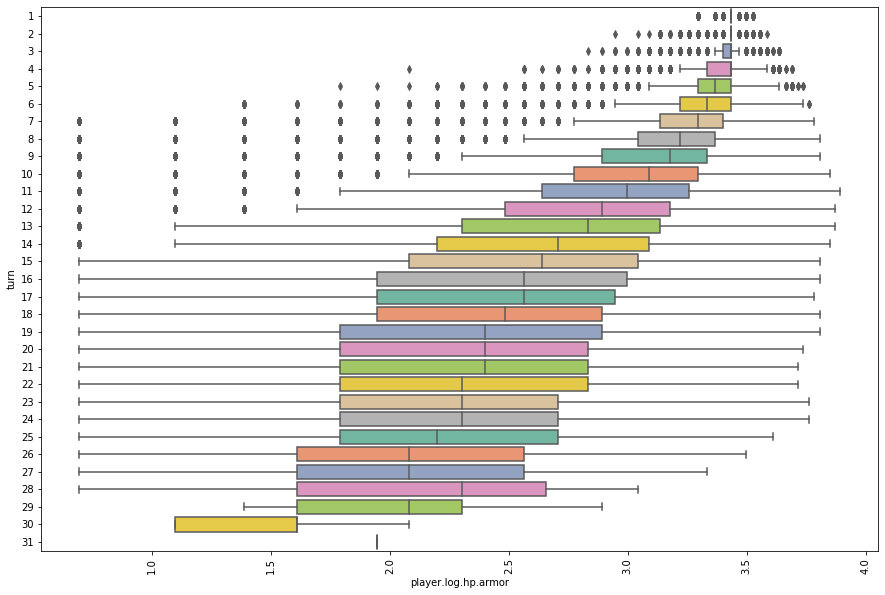

In [37]:
plt.figure(figsize=(15, 10))
sns.boxplot(y='turn', x='player.log.hp.armor', data=df, orient='h', palette='Set2')
plt.xticks(rotation='vertical');

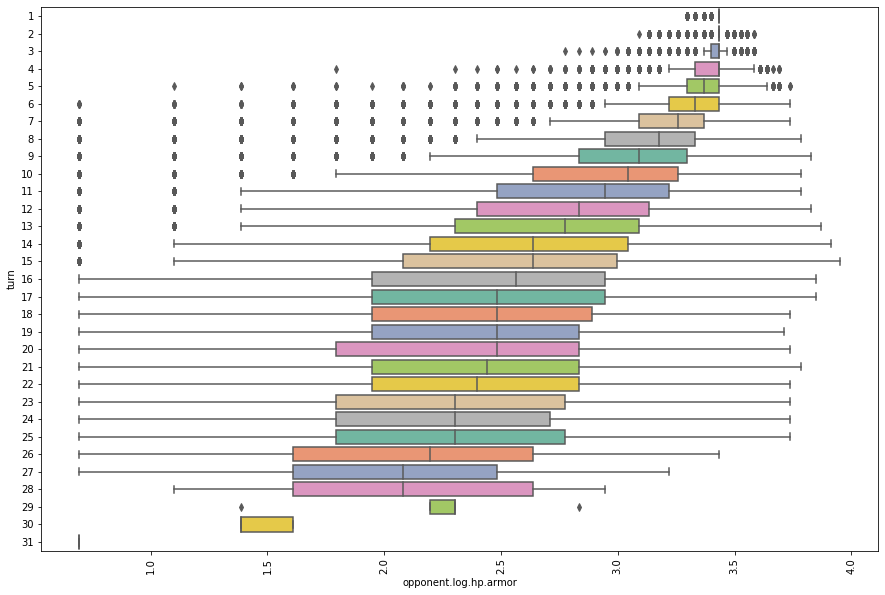

In [38]:
plt.figure(figsize=(15, 10))
sns.boxplot(y='turn', x='opponent.log.hp.armor', data=df, orient='h', palette='Set2')
plt.xticks(rotation='vertical');

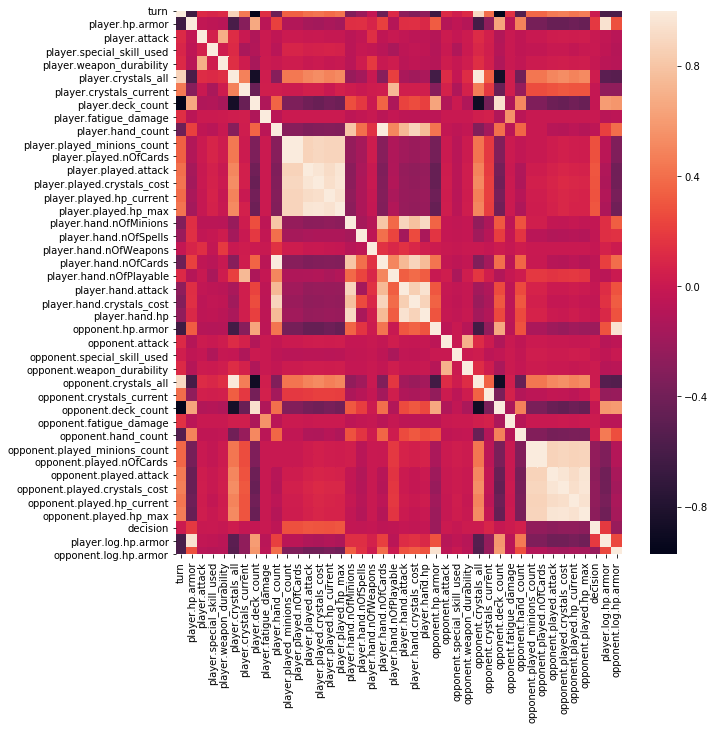

In [39]:
figsize(10,10)
sns.heatmap(df.corr())

In [40]:
print(df[['player.hp.armor']].corrwith(df['decision']))
print(df[['player.log.hp.armor']].corrwith(df['decision']))
print(df[['opponent.hp.armor']].corrwith(df['decision']))
print(df[['opponent.log.hp.armor']].corrwith(df['decision']))

player.hp.armor    0.17779
dtype: float64
player.log.hp.armor    0.190393
dtype: float64
opponent.hp.armor   -0.208921
dtype: float64
opponent.log.hp.armor   -0.219481
dtype: float64


Объединим сильно коррелирующие друг с другом признаки.

In [41]:
player_most_corr = [
    'player.played_minions_count',
    'player.played.nOfCards',
    'player.played.attack',
    'player.played.crystals_cost',
    'player.played.hp_current',
    'player.played.hp_max',
]

opponent_most_corr = [
    'opponent.played_minions_count',
    'opponent.played.nOfCards',
    'opponent.played.attack',
    'opponent.played.crystals_cost',
    'opponent.played.hp_current',
    'opponent.played.hp_max',
]

for label in player_most_corr + opponent_most_corr:
    df[label] = (df[label] - df[label].mean()) / df[label].std()

df['player.played.mean'] = df[player_most_corr].mean(axis=1)
df['player.played.std'] = df[player_most_corr].std(axis=1)
df['opponent.played.mean'] = df[opponent_most_corr].mean(axis=1)
df['opponent.played.std'] = df[opponent_most_corr].std(axis=1)

/home/nikolai/Projects/MIPT-ML-Fall-2019/env/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/nikolai/Projects/MIPT-ML-Fall-2019/env/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/nikolai/Projects/MIPT-ML-Fall-2019/env/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

In [42]:
df.drop(player_most_corr + opponent_most_corr, axis=1, inplace=True)

/home/nikolai/Projects/MIPT-ML-Fall-2019/env/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


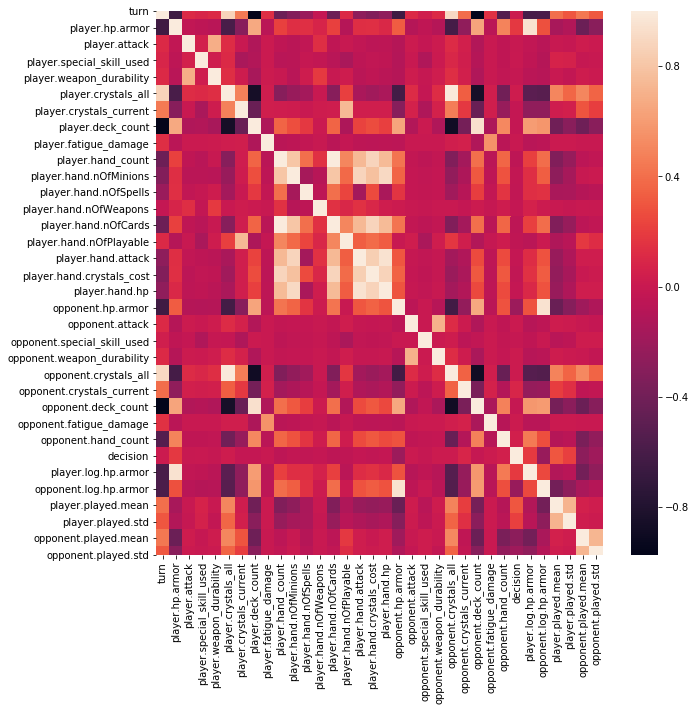

In [43]:
figsize(10,10)
sns.heatmap(df.corr())

In [44]:
#OHE

for name in heroes.values():
    df[f'player.{name}'] = (df['player_hero_name'] == name).astype(np.int8)
    df[f'opponent.{name}'] = (df['opponent_hero_name'] == name).astype(np.int8)

/home/nikolai/Projects/MIPT-ML-Fall-2019/env/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/nikolai/Projects/MIPT-ML-Fall-2019/env/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


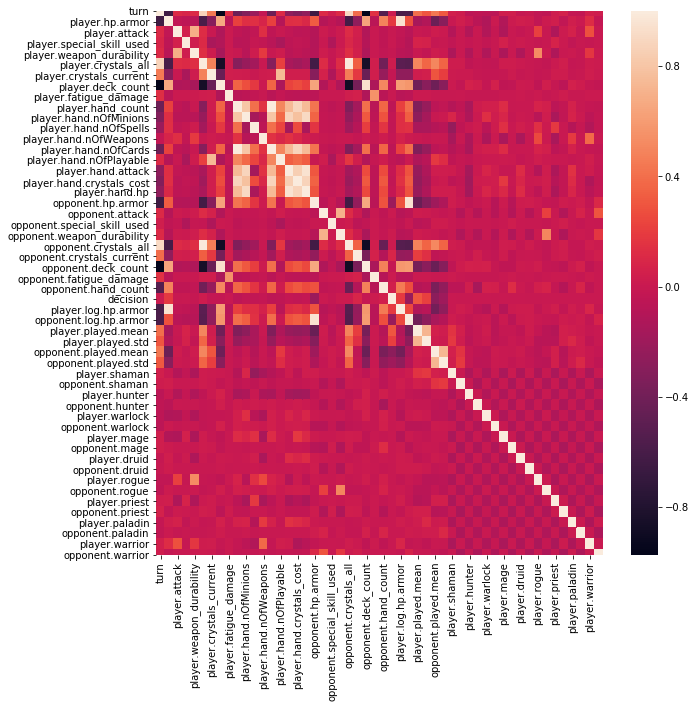

In [45]:
figsize(10,10)
sns.heatmap(df.corr())

In [46]:
# Scaling
to_scale = [
    'turn',
    'player.hp.armor',
    'player.attack',
    'player.special_skill_used', 
    'player.weapon_durability',
    'player.crystals_all',
    'player.crystals_current',
    'player.deck_count',
    'player.fatigue_damage',
    'player.hand_count',
    'player.hand.nOfMinions',
    'player.hand.nOfSpells',
    'player.hand.nOfWeapons',
    'player.hand.nOfCards',
    'player.hand.nOfPlayable',
    'player.hand.attack',
    'player.hand.crystals_cost',
    'player.hand.hp',
    'opponent.hp.armor',
    'opponent.attack',
    'opponent.special_skill_used',
    'opponent.weapon_durability',
    'opponent.crystals_all',
    'opponent.crystals_current',
    'opponent.deck_count',
    'opponent.fatigue_damage',
    'opponent.hand_count',
    'player.log.hp.armor',
    'opponent.log.hp.armor',
    'player.played.mean',
    'player.played.std',
    'opponent.played.mean',
    'opponent.played.std',
    'player.shaman',
    'opponent.shaman',
    'player.hunter',
    'opponent.hunter',
    'player.warlock',
    'opponent.warlock',
    'player.mage',
    'opponent.mage',
    'player.druid',
    'opponent.druid',
    'player.rogue',
    'opponent.rogue',
    'player.priest',
    'opponent.priest',
    'player.paladin',
    'opponent.paladin',
    'player.warrior',
    'opponent.warrior'
]

In [47]:
for column in to_scale:
    df[column] = (df[column] - df[column].mean()) / df[column].std()

In [48]:
df = df.sample(10000, random_state=42)
df_train, df_holdout = train_test_split(df, random_state=42, test_size=0.2, stratify=df['decision'])

2. Настроить валидацию которая относит разные пары героев в разные фолды:

In [49]:
folds = []
for player_name in heroes.values():
    for opponent_name in heroes.values():
        folds.append((
            df_train[(df_train['player_hero_name'] != player_name) |
                     (df_train['opponent_hero_name'] != opponent_name)].index,
            df_train[(df_train['player_hero_name'] == player_name) & 
                     (df_train['opponent_hero_name'] == opponent_name)].index
        ))

In [50]:
def CV(model, df, folds):
    scores = np.zeros(len(folds))
    for i, (train, test) in enumerate(tqdm(folds)):
        train_X = df.loc[train].drop(['decision', 'player_hero_name', 'opponent_hero_name'], axis=1)
        train_y = df.loc[train]['decision']
        model.fit(train_X, train_y)
        test_X = df.loc[test].drop(['decision', 'player_hero_name', 'opponent_hero_name'], axis=1)
        test_y = df.loc[test]['decision']
        scores[i] = roc_auc_score(test_y, model.predict_proba(test_X)[:, 1])
    return scores

3. Обучить KNN, logistic regression, decision tree/random forest из sklearn и сравнить результат:

In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [52]:
scores = CV(KNeighborsClassifier(), df_train, folds)
print(scores.mean(), scores.std())


0.6676233176713327 0.04965444006706573


In [53]:
scores = CV(LogisticRegression(solver='liblinear'), df_train, folds)
print(scores.mean(), scores.std())


0.7944725930147063 0.053549126292783245


In [54]:
scores = CV(DecisionTreeClassifier(), df_train, folds)
print(scores.mean(), scores.std())


0.6270055708165962 0.052734798859722314


In [55]:
scores = CV(RandomForestClassifier(n_estimators=100), df_train, folds)
print(scores.mean(), scores.std())


0.7681440756693851 0.054479186586881466
